<a href="https://colab.research.google.com/github/elenakelly/EurovisionTextAnalysis/blob/main/BERTopic_fulldata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

In [ ]:
!pip install bertopic

In [22]:
import pandas as pd

In [29]:
df = pd.read_csv('lyrics_data.csv')
print(df.head())

                              Song  \
0            De vogels van Holland   
1               Das alte Karussell   
2  Messieurs les noyés de la Seine   
3    Im Wartesaal zum großen Glück   
4                   Le temps perdu   

                                      English Lyrics  
0  The birds of Holland are so musical\nThey alre...  
1  The old carousel\nIt doesn't go as fast anymor...  
2  Ye drowned men of the river Seine (1)\nOpen th...  
3  There is a harbour\nWhere hardly any ship leav...  
4  Sing, carillon\nThe song of lost time\nSing yo...  


In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [35]:
import re
from nltk.corpus import stopwords

def preprocess(text):
    if isinstance(text, str):
        stop_words = set(stopwords.words('english')) 
        text = text.lower()  # Lowercase
        text = re.sub(r'\[.*?\]', '', text)  # Remove text inside brackets
        text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = " ".join([word for word in text.split() if word not in stop_words])  # Remove stopwords
        text = " ".join([word for word in text.split() if len(word) > 2])  # Remove two-letter words
        return text
    else:
        return ''


text = df['English Lyrics'].apply(preprocess)


In [36]:
print(text)

0       birds holland musical already learn twitter ea...
1       old carousel doesnt fast anymore ponies wagone...
2       drowned men river seine open water gates tired...
3       harbour hardly ship leaves one leaves leaves u...
4       sing carillon song lost time sing song fiery h...
                              ...                        
1679    need apologise cuz theres nothing regret well ...
1680    room lives boy could blue might never know thi...
1681    know feeling dream never coming true feel afra...
1682    mother stephania stephania mother field bloomi...
1683    astronaut floating midair broken heart would b...
Name: English Lyrics, Length: 1684, dtype: object


In [37]:
from bertopic import BERTopic
# Initialize BERTopic
topic_model = BERTopic(embedding_model="bert-base-uncased",calculate_probabilities=True, verbose=True)

# Fit the model on your corpus
topics, _ = topic_model.fit_transform(text)


Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Batches:   0%|          | 0/53 [00:00<?, ?it/s]

2023-05-29 12:40:45,875 - BERTopic - Transformed documents to Embeddings
2023-05-29 12:40:56,197 - BERTopic - Reduced dimensionality
2023-05-29 12:40:56,381 - BERTopic - Clustered reduced embeddings


In [38]:
# Show the topics
freq = topic_model.get_topic_info() 
freq

,Topic,Count,Name
0,-1,943,-1_love_dont_like_one
1,0,124,0_life_love_light_time
2,1,63,1_like_satellite_man_happy
3,2,53,2_mamma_rimi_ley_hey
4,3,47,3_dont_aint_youre_know
5,4,47,4_dont_tell_know_time
6,5,46,5_hear_love_voice_listen
7,6,41,6_dance_come_shake_party
8,7,39,7_love_life_feel_make
9,8,36,8_gonna_got_wanna_mama


In [39]:
topic_model.visualize_hierarchy()

In [48]:
similar_topics, similarity = \
topic_model.find_topics("love", top_n = 3) 


print("Most Similar Topic Info: \n{}".format(topic_model.get_topic(similar_topics[0])))
print("Similarity Score: {}".format(similarity[0]))

Most Similar Topic Info: 
[('love', 0.1516950222423713), ('life', 0.049270498799326996), ('feel', 0.03471881085486002), ('make', 0.03153172606017214), ('dream', 0.02988354453580472), ('give', 0.02240419906871922), ('true', 0.02152205314032151), ('heart', 0.021521937402205305), ('power', 0.021076111906091852), ('vampires', 0.02093453494878328)]
Similarity Score: 0.955908088918254


In [41]:
topic_freq = topic_model.get_topic_freq()

for i in range(len(topic_freq)):
    topic_id = topic_freq['Topic'].iloc[i]
    print(f"Topic {topic_id}: {topic_model.get_topic(topic_id)}")



Topic -1: [('love', 0.02208679089473361), ('dont', 0.01724369269878245), ('like', 0.017100021543785923), ('one', 0.01641650263948058), ('know', 0.016329516719981767), ('time', 0.014920099114614848), ('never', 0.014397489661172474), ('day', 0.014134361494102134), ('want', 0.014106244774924878), ('heart', 0.014084649966839334)]
Topic 0: [('life', 0.025135295731688326), ('love', 0.024721037929474547), ('light', 0.019617292106128698), ('time', 0.018900613035465565), ('mile', 0.018523140886852592), ('like', 0.01754857904755341), ('night', 0.017258161777956603), ('heart', 0.0170583818464096), ('see', 0.01671391140421583), ('song', 0.015507526384954007)]
Topic 1: [('like', 0.037024925938998164), ('satellite', 0.03287524980366814), ('man', 0.03279135267591028), ('happy', 0.03011840470324041), ('would', 0.026221915091510985), ('everyone', 0.022425423927133963), ('one', 0.022205126239266616), ('sun', 0.020188337266896946), ('magic', 0.019930230298657658), ('without', 0.019549476331635205)]
Topic

In [42]:
topic_model.visualize_barchart()

In [43]:
topic_model.visualize_heatmap( )

In [49]:
topic_model.visualize_topics( )

In [47]:
from transformers import pipeline

# Initialize the sentiment analysis pipeline
nlp = pipeline('sentiment-analysis')

# Apply sentiment analysis to each song's lyrics
sentiments = [nlp(lyrics[:512])[0] for lyrics in text]

# Extract sentiment labels
sentiment_labels = [result['label'] for result in sentiments]


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [50]:
from collections import Counter

# Count each topic's occurrences
topic_counts = Counter(topics)

# Count each sentiment's occurrences
sentiment_counts = Counter(sentiment_labels)

# Print the most common topics and sentiments
print('Most common topics:', topic_counts.most_common(5))
print('Most common sentiments:', sentiment_counts.most_common(5))


Most common topics: [(-1, 943), (0, 124), (1, 63), (2, 53), (3, 47)]
Most common sentiments: [('POSITIVE', 880), ('NEGATIVE', 804)]


In [51]:
print(f"Length of topics: {len(topics)}")
print(f"Length of sentiment labels: {len(sentiment_labels)}")


Length of topics: 1684
Length of sentiment labels: 1684


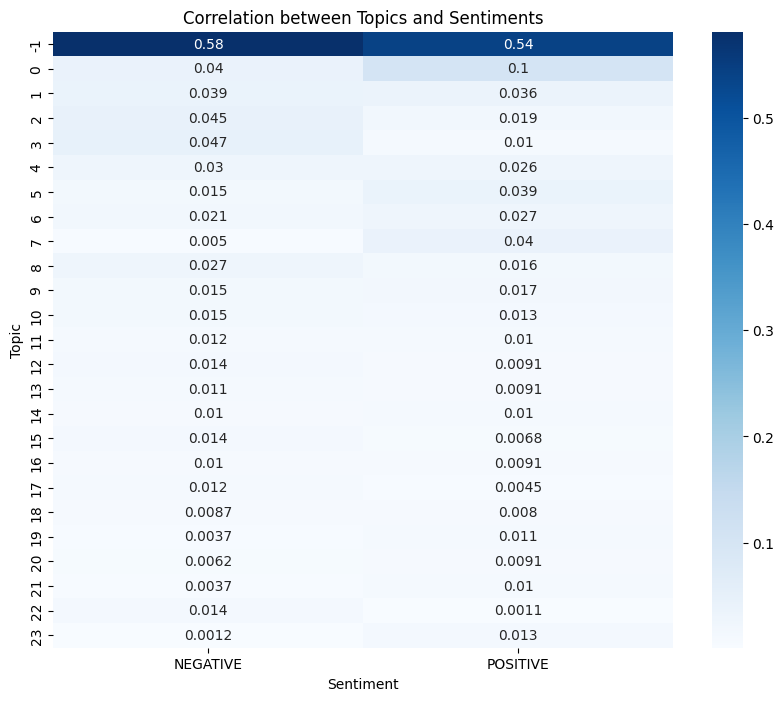

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with your data
# For the sake of the example, let's assume 'topics' and 'sentiment_labels' are your lists of topics and sentiment labels
df = pd.DataFrame({
    'Topic': topics,
    'Sentiment': sentiment_labels
})

# Create a cross-tabulation of topics and sentiments
crosstab = pd.crosstab(df['Topic'], df['Sentiment'])

# Normalize the cross-tabulation to show proportions
crosstab_norm = crosstab / crosstab.sum()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(crosstab_norm, cmap='Blues', annot=True)
plt.title('Correlation between Topics and Sentiments')
plt.show()


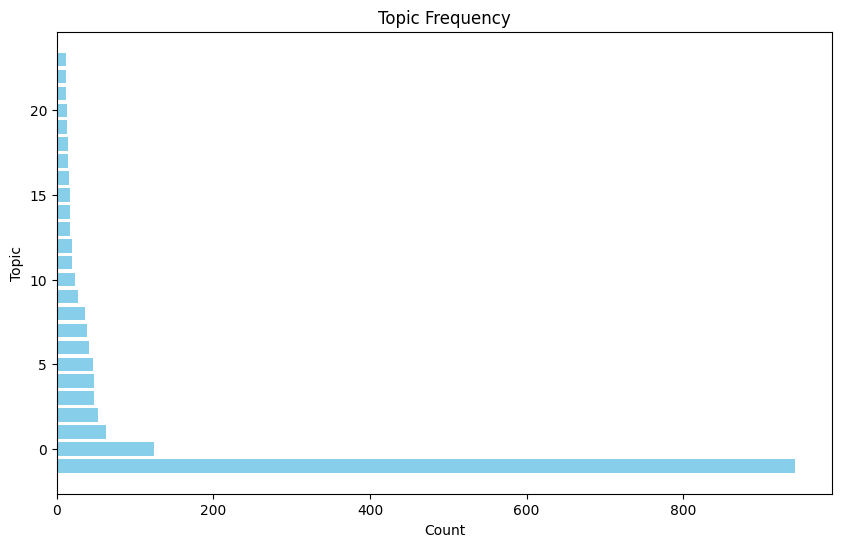

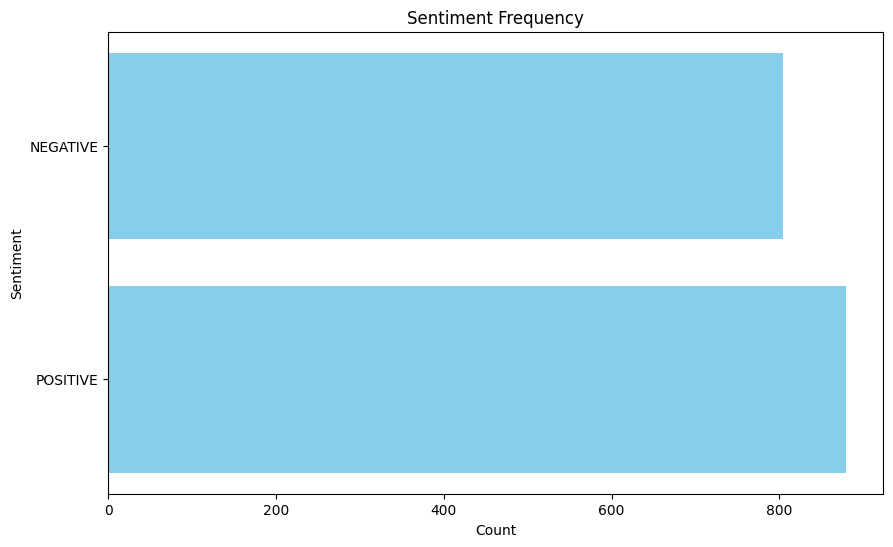

In [53]:
import matplotlib.pyplot as plt

# Separate keys and values for plotting
topics = list(topic_counts.keys())
topic_counts = list(topic_counts.values())
sentiments = list(sentiment_counts.keys())
sentiment_counts = list(sentiment_counts.values())

# Plot the topic data
plt.figure(figsize=(10, 6))
plt.barh(topics, topic_counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Topic')
plt.title('Topic Frequency')
plt.show()

# Plot the sentiment data
plt.figure(figsize=(10, 6))
plt.barh(sentiments, sentiment_counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Sentiment')
plt.title('Sentiment Frequency')
plt.show()
